In [2]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Read Data Set Into Jupyter
df =pd.read_csv('New_DM-DataSet-1.csv')
df.head()

,ID,AGE,GENDER,ETHNICITY,OCCUPATION,MARITAL STATUS,EDU STATUS,RELIGION,HEIGHT (m),WEIGHT(kg),...,LDH(135-225U/L),CK-MB(<10U/L),BNP(<100pg/ml),TnI(24-30pg/ml),Na(135-145mmol/L),K(3-5mmol/L),Cl(90-110mmol/L),Tca(2.02-2.60mmol/L),TCO2(20-30mmol/L),GROUP
0,1,65.0,F,Yoruba,Civil Servant,Married,Tertiary,Christian,NaN,NaN,...,178.0,NaN,500.00,32.02,150.5,4.18,105.4,2.65,27.09,t2dm
1,2,70.0,F,Yoruba,Entrepreneurs,Married,Secondary,Islam,1.55,65.0,...,250.0,NaN,125.00,32.02,144.7,3.57,104.8,1.92,22.30,t2dm
2,3,65.0,M,Yoruba,Entrepreneurs,Married,Secondary,Christian,2.01,65.0,...,NaN,NaN,500.00,32.02,141.5,3.67,102.6,2.21,21.65,t2dm
3,4,58.0,F,Yoruba,Civil Servant,Widowed,Tertiary,Christian,1.65,69.0,...,243.0,1.0,14.30,171.17,141.2,3.71,103.0,2.16,22.79,t2dm
4,5,50.0,F,Yoruba,NaN,NaN,NaN,Christian,NaN,NaN,...,178.0,NaN,9.62,32.02,142.9,3.73,105.9,2.17,22.64,t2dm


In [4]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'ETHNICITY', 'OCCUPATION', 'MARITAL STATUS',
       'EDU STATUS', 'RELIGION', 'HEIGHT (m)', 'WEIGHT(kg)', 'BMI (kg/m2)',
       'MUAC(cm)', 'WRIST CIRCUM(cm)', 'WAIST CIRCUM (cm)', 'SYSTOLIC (mmHg)',
       'DIASTOLIC (mmHg)', 'DIAGNOSED WITH DM BEFORE?', 'HOW LONG', 'DM DRUG',
       'HF DIAGNOSIS', 'HOW LONG.1', 'HF DRUG', 'CHEST PAIN', 'TYPE OF CP',
       'LOCATION OF CP', 'CP SPREAD', 'REGION OF SPREAD',
       'CP AFTER ACTIVITIES', 'CP RELIEVE AFTER REST', 'HIGH SALT',
       'PHYSICALLY ACTIVE', 'CIGARETTE', 'HOW LONG.2', 'HOW MANY CIGAR',
       'FAMILY HISTORY DM', 'FAMILY HISTORY HF', 'DIAGNOSIS', 'GLU (mmol/L)',
       'TC (mmol/L)', 'TG(mmol/L)', 'AST (U/L)', 'ALT (U/L)', 'AST/ALT',
       'LDH(135-225U/L)', 'CK-MB(<10U/L)', 'BNP(<100pg/ml)', 'TnI(24-30pg/ml)',
       'Na(135-145mmol/L)', 'K(3-5mmol/L)', 'Cl(90-110mmol/L)',
       'Tca(2.02-2.60mmol/L)', 'TCO2(20-30mmol/L)', 'GROUP'],
      dtype='object')

In [5]:
# Renaming The columns porperly
df.rename(columns={'MARITAL STATUS':'MARITAL_STATUS','EDU STATUS':'EDU_STATUS','HEIGHT (m)':'HEIGHT(m)','BMI (kg/m2)':'BMI(kgm2)','WRIST CIRCUM(cm)': 'WRIST_CIRCUM(cm)','WAIST CIRCUM (cm)':'WAIST_CIRCUM(cm)','SYSTOLIC (mmHg)':'SYSTOLIC(mmHg)','DIASTOLIC (mmHg)':'DIASTOLIC(mmHg)','DIAGNOSED WITH DM BEFORE?':'DIAGNOSED_WITH_DM_BEFORE?','LOCATION OF CP':'LOCATION_OF_CP','CP SPREAD':'CP_SPREAD','REGION OF SPREAD':'REGION_OF_SPREAD','CP AFTER ACTIVITIES':'CP_AFTER_ACTIVITIES','CP RELIEVE AFTER REST':'CP_RELIEVE_AFTER_REST','HOW LONG':'HOW_LONG','HIGH SALT':'HIGH_SALT','PHYSICALLY ACTIVE':'PHYSICALLY_ACTIVE','CHEST PAIN':'CHEST_PAIN','TYPE OF CP':'TYPE_OF_CP','HOW MANY CIGAR':'HOW_MANY_CIGAR','FAMILY HISTORY DM':'FAMILY_HISTORY_DM','FAMILY HISTORY HF':'FAMILY_HISTORY_HF','DM DRUG':'DM_DRUG','GLU (mmol/L)':'GLU_(mmol/L)','TC (mmol/L)':'TC(mmol/L)','TG(mmol/L)':'TG(mmol/L)','AST (U/L)':'AST(U/L)','ALT (U/L)':'ALT(U/L)','AST/ALT':'AST/ALT','HF DIAGNOSIS':'HF_DIAGNOSIS','HF DRUG':'HF_DRUG'}, inplace=True)
df.columns


Index(['ID', 'AGE', 'GENDER', 'ETHNICITY', 'OCCUPATION', 'MARITAL_STATUS',
       'EDU_STATUS', 'RELIGION', 'HEIGHT(m)', 'WEIGHT(kg)', 'BMI(kgm2)',
       'MUAC(cm)', 'WRIST_CIRCUM(cm)', 'WAIST_CIRCUM(cm)', 'SYSTOLIC(mmHg)',
       'DIASTOLIC(mmHg)', 'DIAGNOSED_WITH_DM_BEFORE?', 'HOW_LONG', 'DM_DRUG',
       'HF_DIAGNOSIS', 'HOW LONG.1', 'HF_DRUG', 'CHEST_PAIN', 'TYPE_OF_CP',
       'LOCATION_OF_CP', 'CP_SPREAD', 'REGION_OF_SPREAD',
       'CP_AFTER_ACTIVITIES', 'CP_RELIEVE_AFTER_REST', 'HIGH_SALT',
       'PHYSICALLY_ACTIVE', 'CIGARETTE', 'HOW LONG.2', 'HOW_MANY_CIGAR',
       'FAMILY_HISTORY_DM', 'FAMILY_HISTORY_HF', 'DIAGNOSIS', 'GLU_(mmol/L)',
       'TC(mmol/L)', 'TG(mmol/L)', 'AST(U/L)', 'ALT(U/L)', 'AST/ALT',
       'LDH(135-225U/L)', 'CK-MB(<10U/L)', 'BNP(<100pg/ml)', 'TnI(24-30pg/ml)',
       'Na(135-145mmol/L)', 'K(3-5mmol/L)', 'Cl(90-110mmol/L)',
       'Tca(2.02-2.60mmol/L)', 'TCO2(20-30mmol/L)', 'GROUP'],
      dtype='object')

In [7]:
# # # Encoding Attack_Vector 
def condition(x):
    if x == 'Metformin':
        return 1
    elif x =='Panfor':
        return 2
    elif x == 'Met formin + Gilmepiride' or 'Metformin + Gilmepiride':
        return 3
    elif x == 'Diet':
        return 4
    elif x =='Gilmepiride':
        return 5
    elif x =='Metformin + Panfor + Gilmepiride':
        return 6
    elif x =='Metformin/Gibenclamide combo':
        return 7
    elif x =='Metformin/Gibenclamide':
        return 8
    else:
        return 0

# #  All NaN values will be replaced with 0
df['DM_DRUG'].fillna(df['DM_DRUG'].mode()[0], inplace=True)
# Applying the conditions
df['DM_DRUG_CODED'] = df['DM_DRUG'].apply(condition)
 
df['DM_DRUG_CODED'].head()

# # recode into categorical numerical variable



0    1
1    1
2    1
3    1
4    1
Name: DM_DRUG_CODED, dtype: int64

In [9]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'ETHNICITY', 'OCCUPATION', 'MARITAL_STATUS',
       'EDU_STATUS', 'RELIGION', 'HEIGHT(m)', 'WEIGHT(kg)', 'BMI(kgm2)',
       'MUAC(cm)', 'WRIST_CIRCUM(cm)', 'WAIST_CIRCUM(cm)', 'SYSTOLIC(mmHg)',
       'DIASTOLIC(mmHg)', 'DIAGNOSED_WITH_DM_BEFORE?', 'HOW_LONG', 'DM_DRUG',
       'HF_DIAGNOSIS', 'HOW LONG.1', 'HF_DRUG', 'CHEST_PAIN', 'TYPE_OF_CP',
       'LOCATION_OF_CP', 'CP_SPREAD', 'REGION_OF_SPREAD',
       'CP_AFTER_ACTIVITIES', 'CP_RELIEVE_AFTER_REST', 'HIGH_SALT',
       'PHYSICALLY_ACTIVE', 'CIGARETTE', 'HOW LONG.2', 'HOW_MANY_CIGAR',
       'FAMILY_HISTORY_DM', 'FAMILY_HISTORY_HF', 'DIAGNOSIS', 'GLU_(mmol/L)',
       'TC(mmol/L)', 'TG(mmol/L)', 'AST(U/L)', 'ALT(U/L)', 'AST/ALT',
       'LDH(135-225U/L)', 'CK-MB(<10U/L)', 'BNP(<100pg/ml)', 'TnI(24-30pg/ml)',
       'Na(135-145mmol/L)', 'K(3-5mmol/L)', 'Cl(90-110mmol/L)',
       'Tca(2.02-2.60mmol/L)', 'TCO2(20-30mmol/L)', 'GROUP', 'DM_DRUG_CODED'],
      dtype='object')

In [10]:
# miss_mean_imputer = SimpleImputer(missing_values='NaN', strategy='mean', axis=0)
# df[['Age', 'Fare']] = miss_mean_imputer.fit_transform(df[['Age', 'Fare']])
df['AGE'] .fillna(int(df['AGE'].mean()), inplace=True)
# df['AGE']
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

df['HEIGHT(m)'].fillna(df['HEIGHT(m)'].mean(),inplace=True)
df['WEIGHT(kg)'].fillna(df['WEIGHT(kg)'].mean(),inplace=True)
df['BMI(kgm2)'].fillna(df['BMI(kgm2)'].mean(),inplace=True)
# df['BNP(<100pg/ml)'].fillna(df['BNP(<100pg/ml)'].mean(),inplace=True)
df['CHEST_PAIN'].fillna(df['CHEST_PAIN'].mode()[0],inplace=True)
df['MUAC(cm)'].fillna(df['MUAC(cm)'].mean(),inplace=True)
df['WRIST_CIRCUM(cm)'].fillna(df['WRIST_CIRCUM(cm)'].mean(),inplace=True)
df['SYSTOLIC(mmHg)'].fillna(df['SYSTOLIC(mmHg)'].mean(),inplace=True)
df['DIASTOLIC(mmHg)'].fillna(df['DIASTOLIC(mmHg)'].mean(),inplace=True)
df['DIAGNOSED_WITH_DM_BEFORE?'].fillna(df['DIAGNOSED_WITH_DM_BEFORE?'].mode()[0],inplace=True)
df['WAIST_CIRCUM(cm)'].fillna(df['WAIST_CIRCUM(cm)'].mean(),inplace=True)
df['HIGH_SALT'].fillna(df['HIGH_SALT'].mode()[0],inplace=True)
df['DM_DRUG'].fillna(df['DM_DRUG'].mode()[0],inplace=True)
df['GLU_(mmol/L)'].fillna(df['GLU_(mmol/L)'].mode()[0],inplace=True)
df['TC(mmol/L)'].fillna(df['TC(mmol/L)'].mode()[0],inplace=True)
df['TG(mmol/L)'].fillna(df['TG(mmol/L)'].mode()[0],inplace=True)
df['AST(U/L)'].fillna(df['AST(U/L)'].mode()[0],inplace=True)
df['ALT(U/L)'].fillna(df['ALT(U/L)'].mode()[0],inplace=True)
df['AST/ALT'].fillna(df['AST/ALT'].mode()[0],inplace=True)
df['CK-MB(<10U/L)'].fillna(df['CK-MB(<10U/L)'].mode()[0],inplace=True)
df['LDH(135-225U/L)'].fillna(df['LDH(135-225U/L)'].mode()[0],inplace=True)
df['TnI(24-30pg/ml)'].fillna(df['TnI(24-30pg/ml)'].mode()[0],inplace=True)
df['Na(135-145mmol/L)'].fillna(df['Na(135-145mmol/L)'].mode()[0],inplace=True)
df['K(3-5mmol/L)'].fillna(df['K(3-5mmol/L)'].mode()[0],inplace=True)
df['Cl(90-110mmol/L)'].fillna(df['Cl(90-110mmol/L)'].mode()[0],inplace=True)
df['Tca(2.02-2.60mmol/L)'].fillna(df['Tca(2.02-2.60mmol/L)'].mode()[0],inplace=True)
df['TCO2(20-30mmol/L)'].fillna(df['TCO2(20-30mmol/L)'].mode()[0],inplace=True)
df['DM_DRUG_CODED'].fillna(df['DM_DRUG_CODED'].mode()[0],inplace=True)
df['BNP(<100pg/ml)'].fillna(df['BNP(<100pg/ml)'].mode()[0],inplace=True)
df['HIGH_SALT'].fillna(df['HIGH_SALT'].mode()[0],inplace=True)
df['PHYSICALLY_ACTIVE'].fillna(df['PHYSICALLY_ACTIVE'].mode()[0],inplace=True)
df['CIGARETTE'].fillna(df['CIGARETTE'].mode()[0],inplace=True)
df['CHEST_PAIN'].fillna(df['CHEST_PAIN'].mode()[0],inplace=True)
df['TYPE_OF_CP'].fillna(df['TYPE_OF_CP'].mode()[0],inplace=True)
df['FAMILY_HISTORY_DM'].fillna(df['FAMILY_HISTORY_DM'].mode()[0],inplace=True)
df['FAMILY_HISTORY_HF'].fillna(df['FAMILY_HISTORY_HF'].mode()[0],inplace=True)
df['HF_DRUG'].fillna(df['HF_DRUG'].mode()[0],inplace=True)
df['MARITAL_STATUS'].fillna(df['MARITAL_STATUS'].mode()[0],inplace=True)
df['EDU_STATUS'].fillna(df['EDU_STATUS'].mode()[0],inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0],inplace=True)
df['HF_DIAGNOSIS'].fillna(df['HF_DIAGNOSIS'].mode()[0],inplace=True)
df['HOW_LONG'].fillna(df['HOW_LONG'].mode()[0],inplace=True)
df['LOCATION_OF_CP'].fillna(df['LOCATION_OF_CP'].mode()[0],inplace=True)

df
# df.columns

C:\Users\user\AppData\Local\Temp\ipykernel_684\2712117060.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGE'] .fillna(int(df['AGE'].mean()), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_684\2712117060.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,ID,AGE,GENDER,ETHNICITY,OCCUPATION,MARITAL_STATUS,EDU_STATUS,RELIGION,HEIGHT(m),WEIGHT(kg),...,CK-MB(<10U/L),BNP(<100pg/ml),TnI(24-30pg/ml),Na(135-145mmol/L),K(3-5mmol/L),Cl(90-110mmol/L),Tca(2.02-2.60mmol/L),TCO2(20-30mmol/L),GROUP,DM_DRUG_CODED
0,1,65.0,F,Yoruba,Civil Servant,Married,Tertiary,Christian,1.658413,67.630645,...,4.0,500.00,32.02,150.5,4.18,105.4,2.65,27.09,t2dm,1
1,2,70.0,F,Yoruba,Entrepreneurs,Married,Secondary,Islam,1.550000,65.000000,...,4.0,125.00,32.02,144.7,3.57,104.8,1.92,22.30,t2dm,1
2,3,65.0,M,Yoruba,Entrepreneurs,Married,Secondary,Christian,2.010000,65.000000,...,4.0,500.00,32.02,141.5,3.67,102.6,2.21,21.65,t2dm,1
3,4,58.0,F,Yoruba,Civil Servant,Widowed,Tertiary,Christian,1.650000,69.000000,...,1.0,14.30,171.17,141.2,3.71,103.0,2.16,22.79,t2dm,1
4,5,50.0,F,Yoruba,Civil Servant,Married,Tertiary,Christian,1.658413,67.630645,...,4.0,9.62,32.02,142.9,3.73,105.9,2.17,22.64,t2dm,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,127,52.0,F,Yoruba,Civil Servant,Married,Tertiary,Christian,1.690000,80.000000,...,4.0,500.00,32.02,141.2,3.38,102.1,2.19,25.70,non-t2dm,1
120,128,49.0,F,Yoruba,Civil Servant,Married,Tertiary,Christian,1.658413,67.630645,...,4.0,500.00,32.02,145.6,3.86,103.0,2.39,30.90,non-t2dm,1
121,129,53.0,M,Yoruba,Civil Servant,Married,Tertiary,NaN,1.658413,67.630645,...,4.0,500.00,32.02,143.5,3.82,103.0,2.25,27.85,non-t2dm,1
122,130,64.0,F,NaN,Civil Servant,Married,Tertiary,NaN,1.658413,67.630645,...,4.0,500.00,32.02,141.2,3.38,102.1,2.19,25.70,non-t2dm,1


In [11]:
df.isnull().any()

ID                           False
AGE                          False
GENDER                       False
ETHNICITY                     True
OCCUPATION                   False
MARITAL_STATUS               False
EDU_STATUS                   False
RELIGION                      True
HEIGHT(m)                    False
WEIGHT(kg)                   False
BMI(kgm2)                    False
MUAC(cm)                     False
WRIST_CIRCUM(cm)             False
WAIST_CIRCUM(cm)             False
SYSTOLIC(mmHg)               False
DIASTOLIC(mmHg)              False
DIAGNOSED_WITH_DM_BEFORE?    False
HOW_LONG                     False
DM_DRUG                      False
HF_DIAGNOSIS                 False
HOW LONG.1                    True
HF_DRUG                      False
CHEST_PAIN                   False
TYPE_OF_CP                   False
LOCATION_OF_CP               False
CP_SPREAD                     True
REGION_OF_SPREAD              True
CP_AFTER_ACTIVITIES           True
CP_RELIEVE_AFTER_RES

In [104]:
# # # Encoding Attack_Vector 
def condition(x):
    if x == 'Yes':
        return 2
    elif x =='No':
        return 1
    else:
        return 0

# #  All NaN values will be replaced with 0
# df['DM_DRUG'].fillna(df['DM_DRUG'].mode()[0], inplace=True)
# Applying the conditions
# df['DM_DRUG_CODED'] = df['DM_DRUG'].apply(condition)
df['HF_DIAGNOSIS_CODED'] = df['HF_DIAGNOSIS'].apply(condition)
 
df['DM_DRUG_CODED'].head()

# # recode into categorical numerical variable



0    1
1    1
2    1
3    1
4    1
Name: DM_DRUG_CODED, dtype: int64

In [14]:
# # # Encoding Attack_Vector 
def condition(x):
    if x == 'Yes':
        return 2
    elif x =='No':
        return 1
    else:
        return 0

# #  All NaN values will be replaced with 0
# df['DM_DRUG'].fillna(df['DM_DRUG'].mode()[0], inplace=True)
# Applying the conditions
df['HF_DIAGNOSIS_CODED'] = df['HF_DIAGNOSIS'].apply(condition)
 
df['HF_DIAGNOSIS_CODED'].head()

# # recode into categorical numerical variable



0    1
1    1
2    1
3    1
4    1
Name: HF_DIAGNOSIS_CODED, dtype: int64

In [15]:
df.isnull().any()

ID                           False
AGE                          False
GENDER                       False
ETHNICITY                     True
OCCUPATION                   False
MARITAL_STATUS               False
EDU_STATUS                   False
RELIGION                      True
HEIGHT(m)                    False
WEIGHT(kg)                   False
BMI(kgm2)                    False
MUAC(cm)                     False
WRIST_CIRCUM(cm)             False
WAIST_CIRCUM(cm)             False
SYSTOLIC(mmHg)               False
DIASTOLIC(mmHg)              False
DIAGNOSED_WITH_DM_BEFORE?    False
HOW_LONG                     False
DM_DRUG                      False
HF_DIAGNOSIS                 False
HOW LONG.1                    True
HF_DRUG                      False
CHEST_PAIN                   False
TYPE_OF_CP                   False
LOCATION_OF_CP               False
CP_SPREAD                     True
REGION_OF_SPREAD              True
CP_AFTER_ACTIVITIES           True
CP_RELIEVE_AFTER_RES

In [16]:
# # # Encoding Attack_Vector 
def condition(x):
    if x == 't2dm':
        return 1
    elif x =='non-t2dm':
        return 0
    

# #  All NaN values will be replaced with 0
# df['DM_DRUG'].fillna(df['DM_DRUG'].mode()[0], inplace=True)
# Applying the conditions
df['T2DM_GROUP'] = df['GROUP'].apply(condition)
 
df['T2DM_GROUP'].head()

# # recode into categorical numerical variable



0    1
1    1
2    1
3    1
4    1
Name: T2DM_GROUP, dtype: int64

In [59]:
x=df[['HEIGHT(m)','WEIGHT(kg)','BMI(kgm2)','WRIST_CIRCUM(cm)','WAIST_CIRCUM(cm)','SYSTOLIC(mmHg)','DIASTOLIC(mmHg)','MUAC(cm)','GLU_(mmol/L)','CK-MB(<10U/L)','BNP(<100pg/ml)','TnI(24-30pg/ml)']]
y=df['T2DM_GROUP']
# Assuming df is your DataFrame
# X = df.iloc[:,10:36].values#features
# y = df.iloc[:,45].values# Target variable
# Splitting the data set

# Here the data set has been divided into train and test data set. The test data set size is 20% of the total records. This test data will not be used in model training and work as an independent test data.

# Splitting train and split data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [60]:
# Storing machine learning algorithms (MLA) in a variable

# Some very popular MLAs we have selected here for comparison and stored in a variable; so that they can be used at later part of the process. The MLAs first we have taken up for comparison are Logistic Regression, Linear Discriminant Analysis, K-nearest neighbour classifier, Decision tree classifier, Naive-Bayes classifier and Support Vector Machine.

# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# models.append(('RFR', RandomForestRegressor()))
models.append(('RFC', RandomForestClassifier()))


c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LR: 0.825000 (0.144482)
LDA: 0.777500 (0.242629)
KNN: 0.675000 (0.256174)
CART: 0.732500 (0.218103)
NB: 0.842500 (0.164526)
SVM: 0.502500 (0.222191)
RFC: 0.837500 (0.190312)


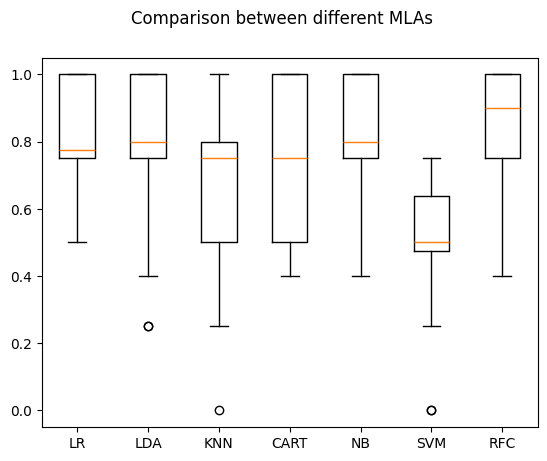

In [61]:
# Creating a box plot to compare there accuracy

# This part of code creates a box plot for all the models against their cross validation score.


## Re-Check for missing data
# x.isnull().any()


# evaluate each model in turn
from random import seed


results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=20, random_state=None)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [62]:
# Importing the logistic regression class and fitting the model
from sklearn.linear_model import LogisticRegression
model1=RandomForestClassifier()
model=GaussianNB()
model1.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
# tunealg = ensemble.ExtraTreesClassifier() #Select the algorithm to be tuned
# tunealg.fit(x_train, y_train)

# print('BEFORE tuning Parameters: ', tunealg.get_params())
# print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(x_train, y_train))) 
# print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(x_test, y_test)))
# print('-'*10)

In [64]:
y_pred=model1.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [65]:

# Calculation different statistics to evaluate model fit
from sklearn import metrics
print("Acuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall score:", metrics.recall_score(y_test, y_pred,average='macro'))

Acuracy: 0.868421052631579
Precision score: 0.8797101449275362
Recall score: 0.8638888888888889


In [66]:
# Detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.93      0.78      0.85        18

    accuracy                           0.87        38
   macro avg       0.88      0.86      0.87        38
weighted avg       0.88      0.87      0.87        38



In [67]:
# Storing machine learning algorithms (MLA) in a variable

# Some very popular MLAs we have selected here for comparison and stored in a variable; so that they can be used at later part of the process. The MLAs first we have taken up for comparison are Logistic Regression, Linear Discriminant Analysis, K-nearest neighbour classifier, Decision tree classifier, Naive-Bayes classifier and Support Vector Machine.

# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))
models.append(('ADBC',AdaBoostClassifier()))
models.append(('BGC',BaggingClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('GBC',GradientBoostingClassifier()))

In [68]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [69]:
from sklearn.metrics import roc_auc_score

In [70]:

# MLA_columns = ['MLA Test Accuracy']
# MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    auc_score = roc_auc_score(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, "Train Accuracy"] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    # MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    MLA_compare.loc[row_index, 'AUC'] = auc_score

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
6,BaggingClassifier,0.9767,0.9211,0.941176,0.888889,0.919444
9,RandomForestClassifier,1.0000,0.8947,0.937500,0.833333,0.891667
8,GradientBoostingClassifier,1.0000,0.8684,0.882353,0.833333,0.866667
2,RidgeClassifierCV,0.8837,0.8421,0.833333,0.833333,0.841667
14,DecisionTreeClassifier,1.0000,0.8421,0.833333,0.833333,0.841667
5,AdaBoostClassifier,1.0000,0.8421,0.833333,0.833333,0.841667
12,NuSVC,0.9070,0.8158,0.761905,0.888889,0.819444
7,ExtraTreesClassifier,1.0000,0.8158,0.866667,0.722222,0.811111
16,GaussianNB,0.8488,0.7895,0.857143,0.666667,0.783333
13,LinearSVC,0.8953,0.7895,0.750000,0.833333,0.791667


C:\Users\user\AppData\Local\Temp\ipykernel_684\3474620721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))


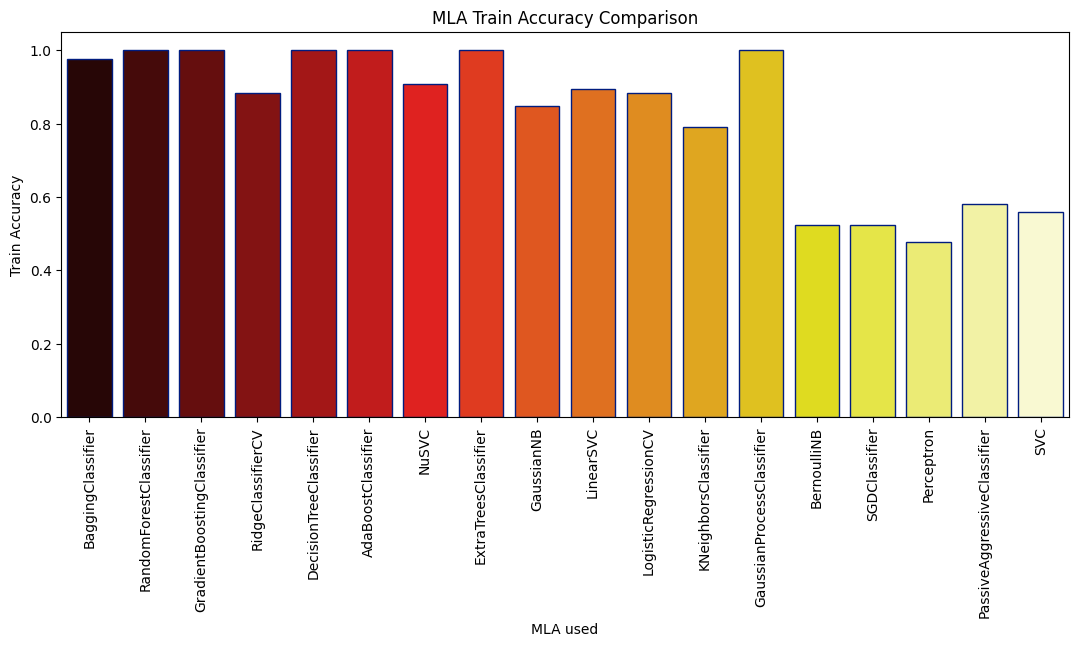

In [71]:
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_684\995690519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))


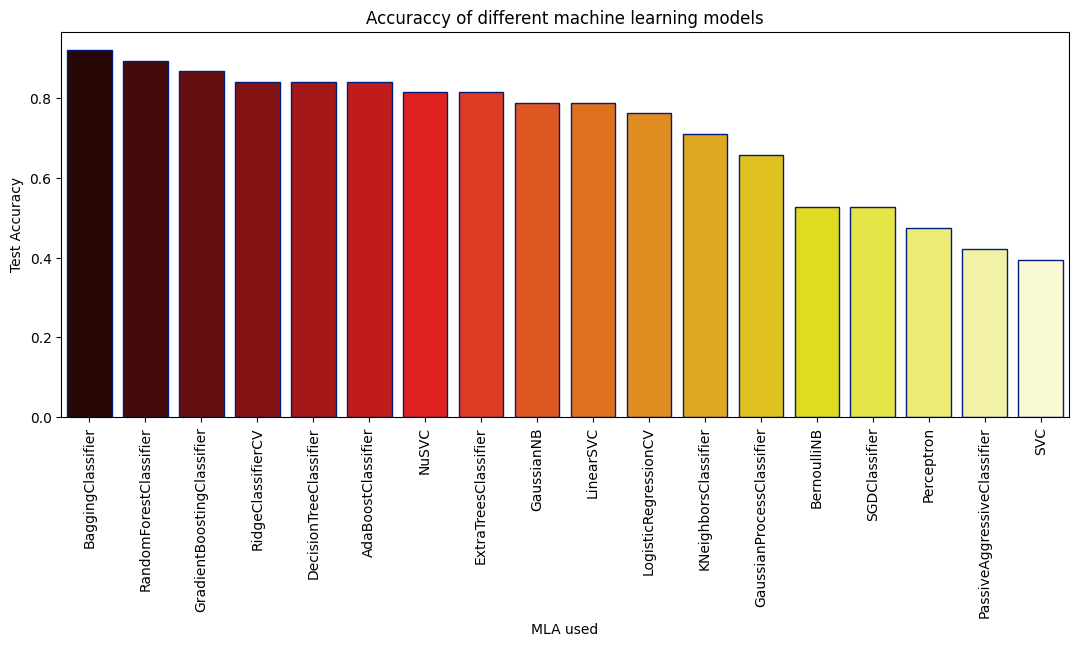

In [72]:
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_684\1696133987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MLA used", y="Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))


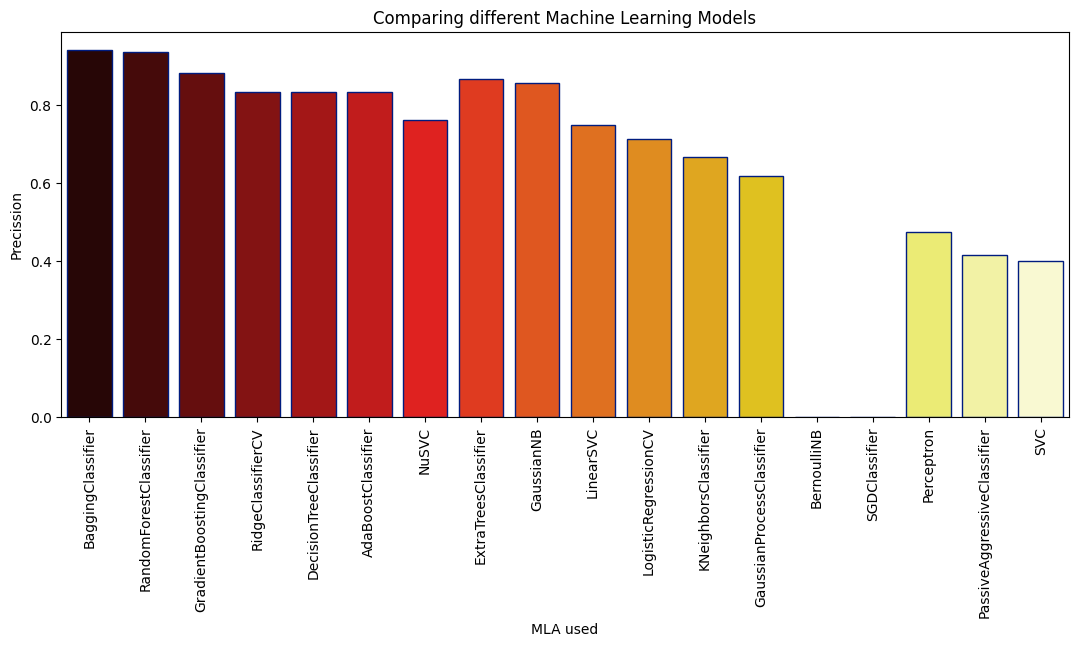

In [73]:
# Creating plots to compare precission of the MLAs
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_684\1576849565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MLA used", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))


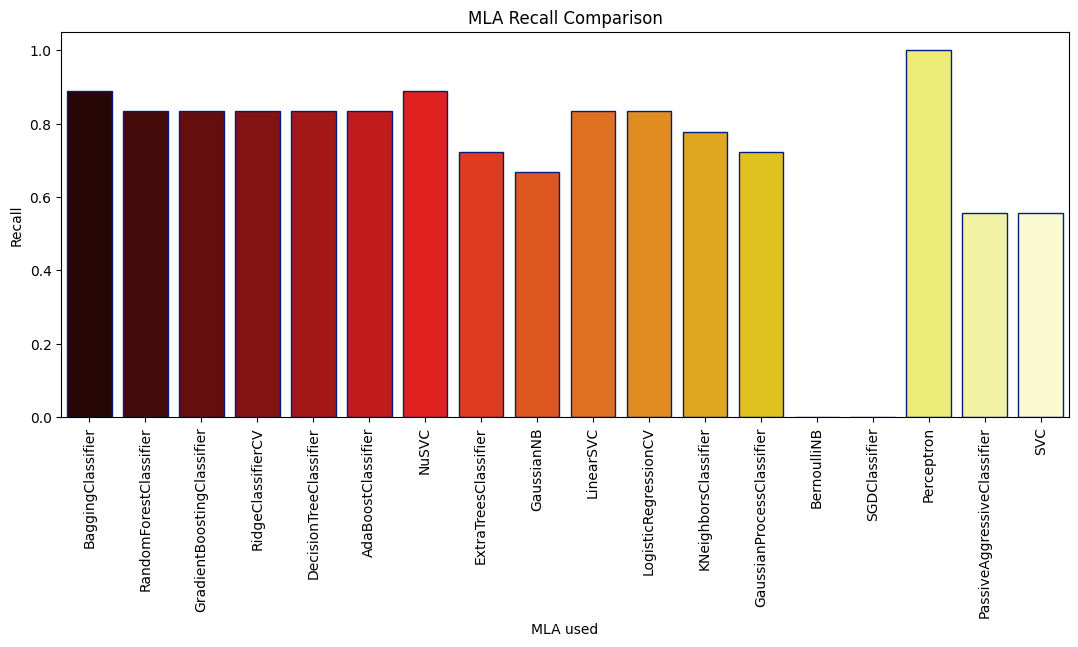

In [74]:
# Creating plots for MLA recall comparison
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_684\3400239689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MLA used", y="AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))


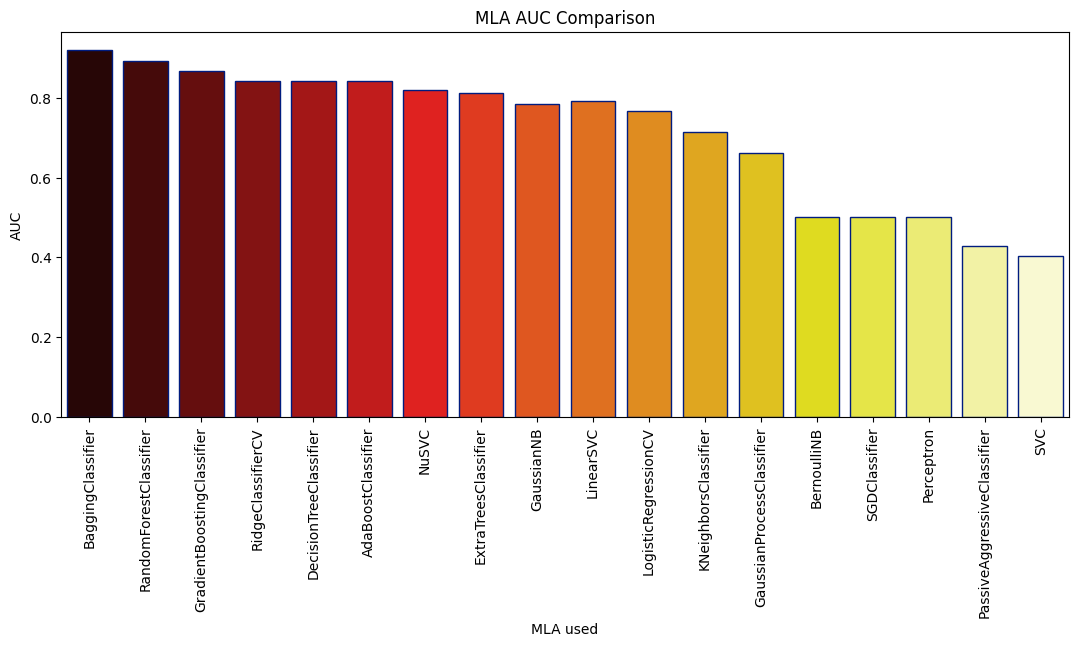

In [75]:
# Creating plot for MLA AUC comparison
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

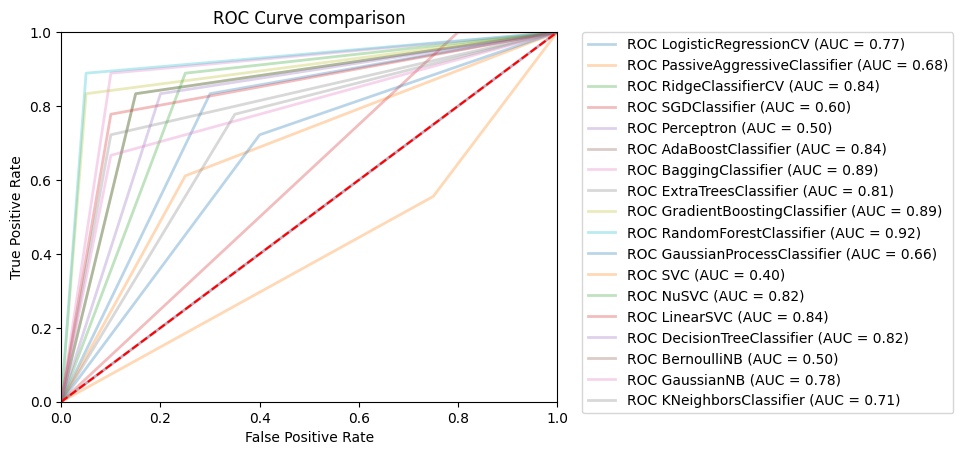

In [76]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

Creating ROC for all the models applied

Receiver Operating Characteristic (ROC) curve is a very important tool to diagnose the performance of MLAs by plotting the true positive rates against the false-positive rates at different threshold levels. The area under ROC curve often called AUC and it is also a good measure of the predictability of the machine learning algorithms. A higher AUC is an indication of more accurate prediction.

Tuning the algorithm

In [77]:
tunealg = ensemble.ExtraTreesClassifier() #Select the algorithm to be tuned
tunealg.fit(x_train, y_train)

print('BEFORE tuning Parameters: ', tunealg.get_params())
print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(x_test, y_test)))
print('-'*10)

BEFORE tuning Parameters:  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE tuning Training w/bin set score: 1.00
BEFORE tuning Test w/bin set score: 0.84
----------


In [78]:
# Creating confusion matrix to check the accuracy of prediction
# import the metrics class
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[19,  1],
       [ 4, 14]], dtype=int64)

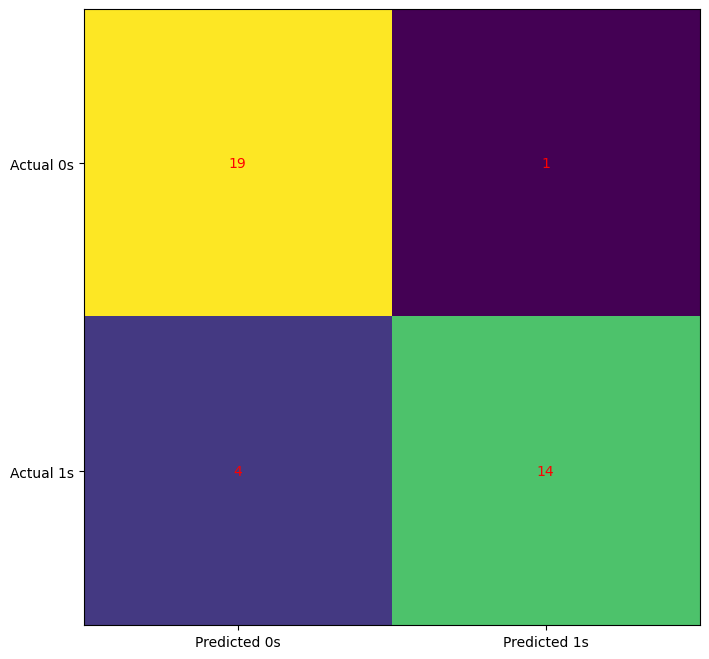

In [79]:
#Creating a heatmap for the confusion matrix
cm=conf_matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [80]:
# Creating confusion matrix to check the accuracy of prediction
# import the metrics class
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[19,  1],
       [ 4, 14]], dtype=int64)

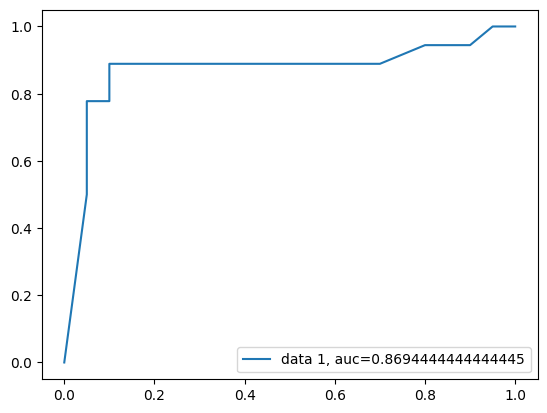

In [83]:
# Creating Reciever Operating Characteristic (ROC) curve
y_pred_proba = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

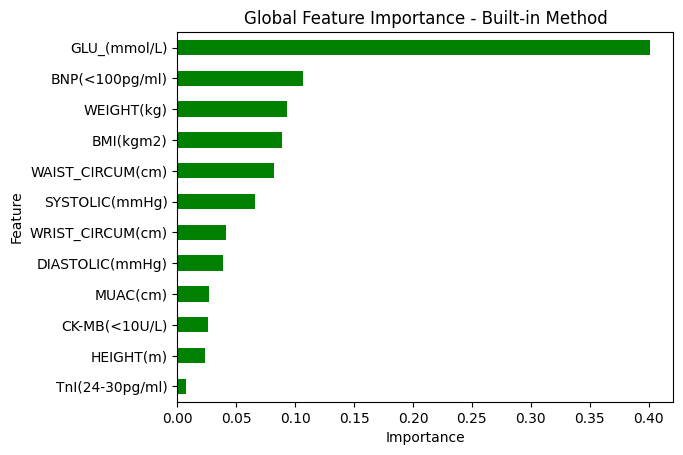

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

global_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [93]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = x_test.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
HEIGHT(m),-0.023684,0.007895
WEIGHT(kg),-0.013158,0.013158
CK-MB(<10U/L),0.000000,0.016644
DIASTOLIC(mmHg),0.000000,0.000000
WRIST_CIRCUM(cm),0.000000,0.000000
GLU_(mmol/L),0.000000,0.000000
WAIST_CIRCUM(cm),0.002632,0.007895
BMI(kgm2),0.007895,0.020553
TnI(24-30pg/ml),0.010526,0.017456
MUAC(cm),0.015789,0.012892


In [97]:
from sklearn.inspection import permutation_importance

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = x_test.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
SYSTOLIC(mmHg),-0.011850,0.039152
HEIGHT(m),-0.010854,0.032239
DIASTOLIC(mmHg),-0.001911,0.003567
WRIST_CIRCUM(cm),-0.000110,0.004044
GLU_(mmol/L),0.003626,0.028310
BMI(kgm2),0.003800,0.004122
BNP(<100pg/ml),0.004634,0.004292
WEIGHT(kg),0.004955,0.003962
WAIST_CIRCUM(cm),0.024875,0.015895
TnI(24-30pg/ml),0.031650,0.022031


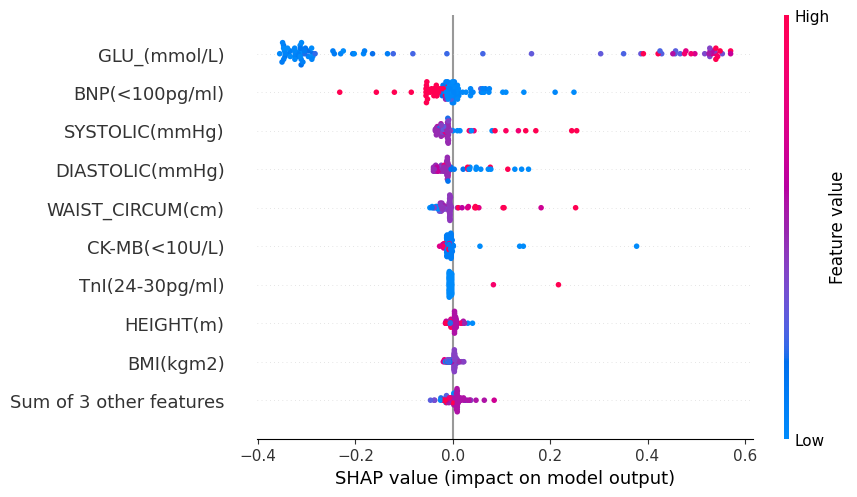

In [98]:
import shap

explainer = shap.Explainer(rf)
shap_values = explainer(x_train)

shap.plots.beeswarm(shap_values)

In [99]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

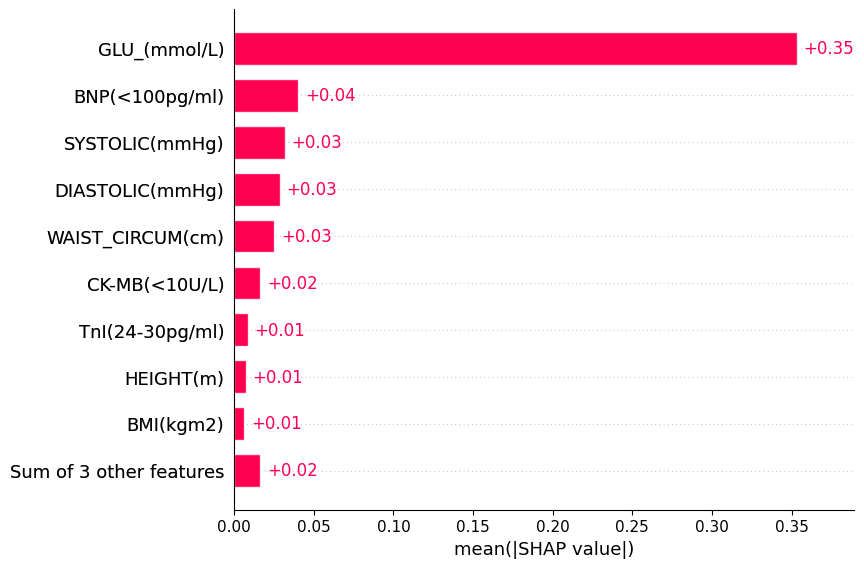

In [100]:
shap.plots.bar(shap_values)

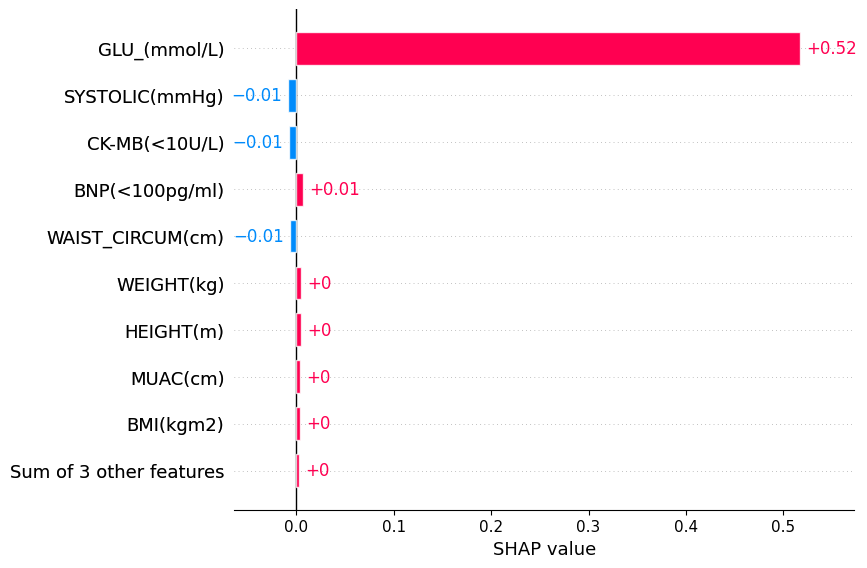

In [101]:
shap.plots.bar(shap_values[0])

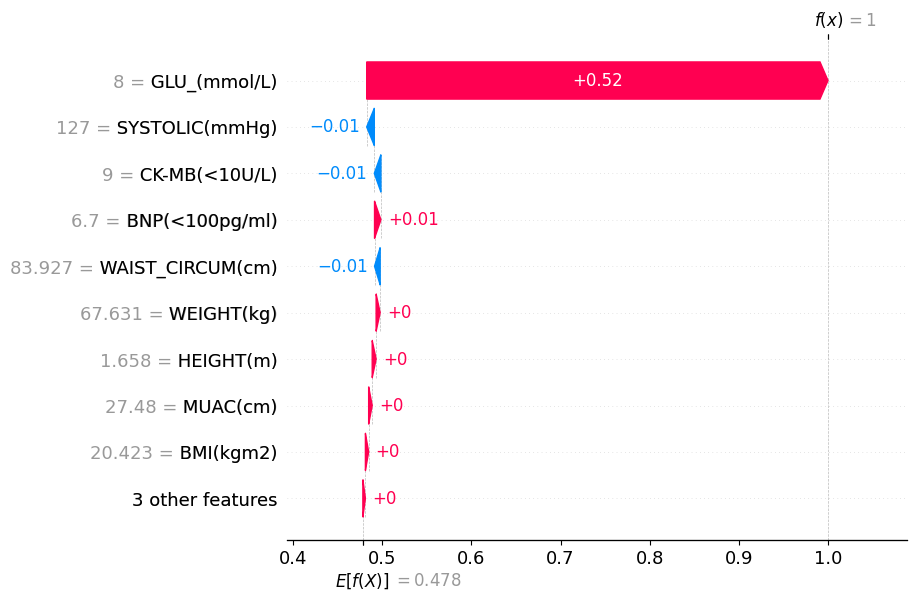

In [102]:
shap.plots.waterfall(shap_values[0])

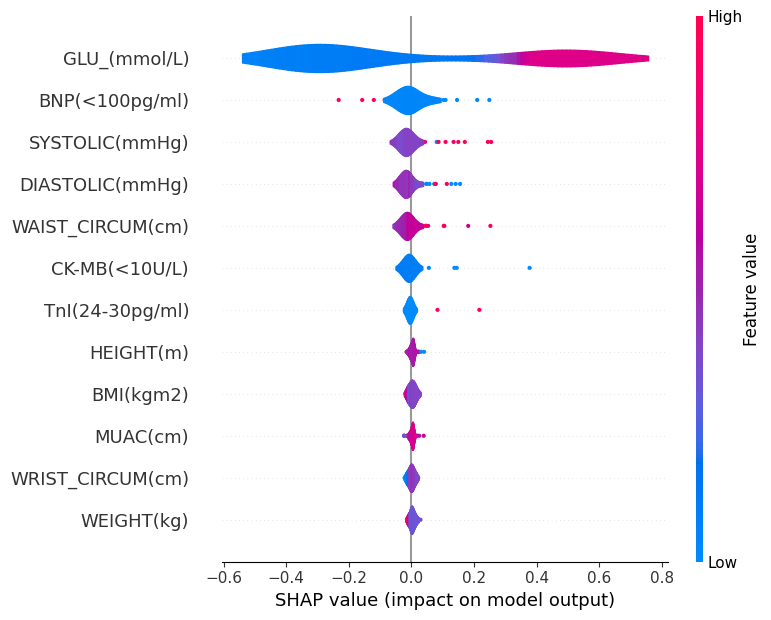

In [103]:
shap.summary_plot(shap_values, plot_type='violin')

In [38]:
df

,ID,AGE,GENDER,ETHNICITY,OCCUPATION,MARITAL_STATUS,EDU_STATUS,RELIGION,HEIGHT(m),WEIGHT(kg),...,CK-MB(<10U/L),BNP(<100pg/ml),TnI(24-30pg/ml),Na(135-145mmol/L),K(3-5mmol/L),Cl(90-110mmol/L),Tca(2.02-2.60mmol/L),TCO2(20-30mmol/L),DM_DRUG_CODED,HF_DIAGNOSIS_CODED
0,1,65.0,F,Yoruba,Civil Servant,Married,Tertiary,Christian,1.651429,65.538462,...,4.0,500.00,32.02,150.5,4.18,105.4,2.65,27.09,1,1
1,2,70.0,F,Yoruba,Entrepreneurs,Married,Secondary,Islam,1.550000,65.000000,...,4.0,125.00,32.02,144.7,3.57,104.8,1.92,22.30,1,1
2,3,65.0,M,Yoruba,Entrepreneurs,Married,Secondary,Christian,2.010000,65.000000,...,4.0,500.00,32.02,141.5,3.67,102.6,2.21,21.65,1,1
3,4,58.0,F,Yoruba,Civil Servant,Widowed,Tertiary,Christian,1.650000,69.000000,...,1.0,14.30,171.17,141.2,3.71,103.0,2.16,22.79,1,1
4,5,50.0,F,Yoruba,Entrepreneurs,Married,Tertiary,Christian,1.651429,65.538462,...,4.0,9.62,32.02,142.9,3.73,105.9,2.17,22.64,1,1
5,6,80.0,F,Yoruba,Entrepreneurs,Married,Tertiary,Christian,1.651429,65.538462,...,2.0,12.20,32.02,142.9,3.72,106.2,2.57,22.89,1,1
6,7,65.0,F,Yoruba,Civil Servant,Married,Secondary,Christian,1.651429,65.538462,...,9.0,6.70,32.02,147.2,5.04,102.4,2.45,25.73,1,1
7,8,58.0,F,Yoruba,Entrepreneurs,Married,Tertiary,Christian,1.651429,65.538462,...,2.0,38.50,32.02,143.3,3.69,106.6,2.03,21.65,1,1
8,9,85.0,F,Yoruba,Entrepreneurs,Widowed,Secondary,Islam,1.470000,50.000000,...,3.0,12.20,32.02,139.4,4.33,102.1,2.29,27.49,1,1
9,10,65.0,F,Yoruba,Entrepreneurs,Married,Tertiary,Christian,1.651429,65.538462,...,12.0,8.90,32.02,150.5,4.18,105.4,2.65,27.09,1,1


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)


c:\Users\user\.virtualenvs\pelumi-W7jY0X2E\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [62]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

predictions

Out-of-Bag Score: 0.9353324641460234
Mean Squared Error: 8.06451612903226e-05
R-squared: 0.9996766623207302


array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.1, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [1]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


NameError: name 'regressor' is not defined

In [54]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.9353324641460234
Mean Squared Error: 8.06451612903226e-05
R-squared: 0.9996766623207302


In [103]:
# Assuming df is your DataFrame
# X = df.iloc[:,1:2].values#features
# y = df.iloc[:,2].values# Target variable


In [55]:
import numpy as np
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 

plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points

plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


NameError: name 'X' is not defined

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [105]:
# Assuming df is your DataFrame
X = df.iloc[:,1:2].values#features
y = df.iloc[:,2].values# Target variable


In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Check for and handle categorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)